In [ ]:
import pandas as pd
import yfinance as yf

# ファイルの読み込み
file_path = 'sp500.csv'  # ファイルのパスを適切に設定
sp500_stocks = pd.read_csv(file_path)

symbols = sp500_stocks['Symbol'].tolist()

# データの保存用DataFrameを初期化
financial_df = pd.DataFrame()

# 各銘柄の財務情報を取得してDataFrameに追加
for symbol in symbols:
    stock = yf.Ticker(symbol)
    info = stock.info
    
    # 必要なデータを抽出
    data = {
        'symbol': symbol,
        'marketCap': info.get('marketCap'),
        'trailingPE': info.get('trailingPE'),
        'priceToBook': info.get('priceToBook'),
        'profitMargins': info.get('profitMargins'),
        'revenue': info.get('revenue'),
        'grossProfits': info.get('grossProfits'),
        'totalAssets': info.get('totalAssets'),
        'totalLiab': info.get('totalLiab'),
        'totalCash': info.get('totalCash')
    }

    
    # DataFrameに追加
    financial_df = financial_df.append(pd.Series(data), ignore_index=True)

# 結果を表示
print(financial_df)


In [4]:
#csvファイルに保存
financial_df.to_csv('sp500_financial_data.csv')

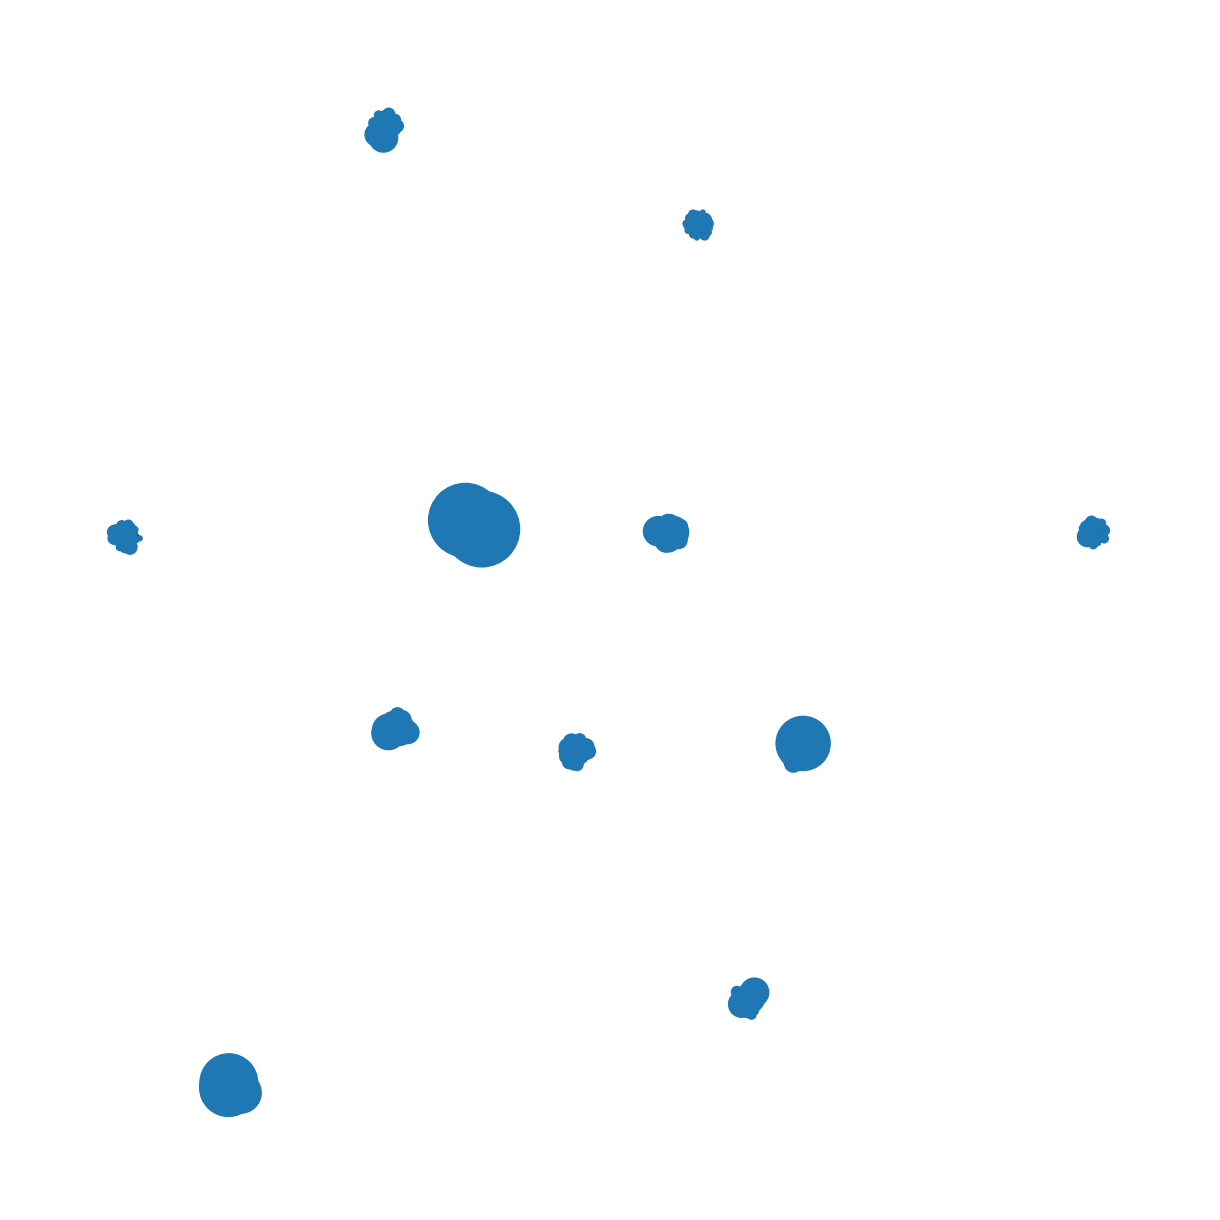

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# ファイルの読み込みパス
sp500_data_path = 'sp500.csv'
financial_data_path = 'sp500_financial_data.csv'

# データの読み込み
sp500_data = pd.read_csv(sp500_data_path)
financial_data = pd.read_csv(financial_data_path)

# グラフの初期化
G = nx.Graph()

# ノード（株式）の追加
for index, row in sp500_data.iterrows():
    industry = row['GICS Sector']
    symbol = row['Symbol']
    # 財務データの追加（市場資本など）
    financial_row = financial_data[financial_data['symbol'] == symbol]
    market_cap = financial_row['marketCap'].iloc[0] if not financial_row.empty else None
    G.add_node(symbol, industry=industry, marketCap=market_cap)

# 同じ業界の株式間にエッジを追加
industry_groups = sp500_data.groupby('GICS Sector')
for industry, group in industry_groups:
    symbols = group['Symbol'].tolist()
    for i in range(len(symbols)):
        for j in range(i+1, len(symbols)):
            G.add_edge(symbols[i], symbols[j])

# ノードのサイズを市場資本に基づいて設定
node_sizes = [G.nodes[node]['marketCap'] / 1e9 if G.nodes[node]['marketCap'] is not None else 10 for node in G.nodes]

# グラフの描画
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=False, node_size=node_sizes)
plt.show()